## Problem Statment 
To predict whether the customer/client will terminate their relations with the company or not.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from warnings import filterwarnings
filterwarnings('ignore')

In [3]:
pwd = os.getcwd()
filepath = os.path.join(pwd, "train.csv")
filepath

'd:\\python_ml\\New folder\\train.csv'

In [6]:
df = pd.read_csv(filepath,na_values = ['?','Error','Unknown'])
df.head()

,customer_id,Name,age,gender,security_no,region_category,membership_category,joining_date,joined_through_referral,referral_id,...,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score
0,fffe4300490044003600300030003800,Pattie Morrisey,18,F,XW0DQ7H,Village,Platinum Membership,2017-08-17,No,xxxxxxxx,...,300.63,53005.25,17.0,781.75,Yes,Yes,No,Not Applicable,Products always in Stock,2
1,fffe43004900440032003100300035003700,Traci Peery,32,F,5K0N3X1,City,Premium Membership,2017-08-28,NaN,CID21329,...,306.34,12838.38,10.0,NaN,Yes,No,Yes,Solved,Quality Customer Care,1
2,fffe4300490044003100390032003600,Merideth Mcmeen,44,F,1F2TCL3,Town,No Membership,2016-11-11,Yes,CID12313,...,516.16,21027.00,22.0,500.69,No,Yes,Yes,Solved in Follow-up,Poor Website,5
3,fffe43004900440036003000330031003600,Eufemia Cardwell,37,M,VJGJ33N,City,No Membership,2016-10-29,Yes,CID3793,...,53.27,25239.56,6.0,567.66,No,Yes,Yes,Unsolved,Poor Website,5
4,fffe43004900440031003900350030003600,Meghan Kosak,31,F,SVZXCWB,City,No Membership,2017-09-12,No,xxxxxxxx,...,113.13,24483.66,16.0,663.06,No,Yes,Yes,Solved,Poor Website,5


In [7]:
df['churn_risk_score'].value_counts() ## Target Variable

 3    10424
 4    10185
 5     9827
 2     2741
 1     2652
-1     1163
Name: churn_risk_score, dtype: int64

In [16]:
df.drop(df[df['churn_risk_score'] < 1].index, inplace = True) #less than one is own company employee

In [17]:
df.drop(['customer_id', 'Name' , 'security_no' ,
       'referral_id', 'last_visit_time'] , axis = 1 , inplace = True) #dropig some Feature

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           35829 non-null  int64  
 1   gender                        35773 non-null  object 
 2   region_category               30566 non-null  object 
 3   membership_category           35829 non-null  object 
 4   joining_date                  35829 non-null  object 
 5   joined_through_referral       30537 non-null  object 
 6   preferred_offer_types         35553 non-null  object 
 7   medium_of_operation           30599 non-null  object 
 8   internet_option               35829 non-null  object 
 9   days_since_last_login         35829 non-null  int64  
 10  avg_time_spent                35829 non-null  float64
 11  avg_transaction_value         35829 non-null  float64
 12  avg_frequency_login_days      32410 non-null  float64
 13  p

In [20]:
df.describe()   

,age,days_since_last_login,avg_time_spent,avg_transaction_value,avg_frequency_login_days,points_in_wallet,churn_risk_score
count,35829.000000,35829.000000,35829.000000,35829.000000,32410.000000,32488.000000,35829.000000
mean,37.120266,-42.143906,243.373859,29304.272306,15.963040,686.849231,3.608278
std,15.865360,229.254856,397.784650,19484.565419,9.205918,194.574486,1.176426
min,10.000000,-999.000000,-2814.109110,800.460000,-43.652702,-760.661236,1.000000
25%,23.000000,8.000000,59.810000,14194.650000,9.000000,615.967500,3.000000
50%,37.000000,12.000000,161.620000,27584.530000,16.000000,697.820000,4.000000
75%,51.000000,16.000000,356.330000,40874.010000,23.000000,764.002500,5.000000
max,64.000000,26.000000,3235.578521,99914.050000,73.061995,2069.069761,5.000000


In [21]:
df.describe(include='O').T  ## It gives output as statistics such as count,frequency,uniqueness e.t.c for non-numeric features.

,count,unique,top,freq
gender,35773,2,F,17892
region_category,30566,3,Town,13702
membership_category,35829,6,Basic Membership,7473
joining_date,35829,1096,2015-06-02,55
joined_through_referral,30537,2,No,15354
preferred_offer_types,35553,3,Gift Vouchers/Coupons,11977
medium_of_operation,30599,3,Desktop,13476
internet_option,35829,3,Wi-Fi,12016
used_special_discount,35829,2,Yes,19718
offer_application_preference,35829,2,Yes,19783


In [22]:
df.isnull().sum() 

age                                0
gender                            56
region_category                 5263
membership_category                0
joining_date                       0
joined_through_referral         5292
preferred_offer_types            276
medium_of_operation             5230
internet_option                    0
days_since_last_login              0
avg_time_spent                     0
avg_transaction_value              0
avg_frequency_login_days        3419
points_in_wallet                3341
used_special_discount              0
offer_application_preference       0
past_complaint                     0
complaint_status                   0
feedback                           0
churn_risk_score                   0
dtype: int64

## Handling Missing value's 

In [24]:
## Categorical Data
df['region_category'] = df['region_category'].fillna(df['region_category'].mode()[0])
df['preferred_offer_types'] = df['preferred_offer_types'].fillna(df['preferred_offer_types'].mode()[0])
df['gender'] = df['gender'].fillna(df['gender'].mode()[0])
df['joined_through_referral'] = df['joined_through_referral'].fillna(df['joined_through_referral'].mode()[0])
df['medium_of_operation'] = df['medium_of_operation'].fillna(df['medium_of_operation'].mode()[0])

In [25]:
## numerical data
df['points_in_wallet'] = df['points_in_wallet'].fillna(df['points_in_wallet'].mean())
df['avg_frequency_login_days'] = df['avg_frequency_login_days'].fillna(df['avg_frequency_login_days'].mean())

In [26]:
df.isnull().sum()

age                             0
gender                          0
region_category                 0
membership_category             0
joining_date                    0
joined_through_referral         0
preferred_offer_types           0
medium_of_operation             0
internet_option                 0
days_since_last_login           0
avg_time_spent                  0
avg_transaction_value           0
avg_frequency_login_days        0
points_in_wallet                0
used_special_discount           0
offer_application_preference    0
past_complaint                  0
complaint_status                0
feedback                        0
churn_risk_score                0
dtype: int64

In [38]:
df[['joining_date']]

,joining_date
0,2017-08-17
1,2017-08-28
2,2016-11-11
3,2016-10-29
4,2017-09-12
...,...
36987,2017-09-21
36988,2016-06-27
36989,2016-09-11
36990,2017-06-15


In [39]:
df['joining_day'] = pd.to_datetime(df.joining_date , format = "%Y/%m/%d").dt.day           # Extracting Day
df['joining_month'] = pd.to_datetime(df.joining_date , format = "%Y/%m/%d").dt.month       # Extracting Month
df['joining_year'] = pd.to_datetime(df.joining_date , format = "%Y/%m/%d").dt.year         # Extracting Year

df.drop(['joining_date'] , axis = 1 , inplace = True)      # Dropping joining_date

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35829 entries, 0 to 36991
Data columns (total 22 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   age                           35829 non-null  int64  
 1   gender                        35829 non-null  object 
 2   region_category               35829 non-null  object 
 3   membership_category           35829 non-null  object 
 4   joined_through_referral       35829 non-null  object 
 5   preferred_offer_types         35829 non-null  object 
 6   medium_of_operation           35829 non-null  object 
 7   internet_option               35829 non-null  object 
 8   days_since_last_login         35829 non-null  int64  
 9   avg_time_spent                35829 non-null  float64
 10  avg_transaction_value         35829 non-null  float64
 11  avg_frequency_login_days      35829 non-null  float64
 12  points_in_wallet              35829 non-null  float64
 13  u

In [91]:
import matplotlib.gridspec as gridspec

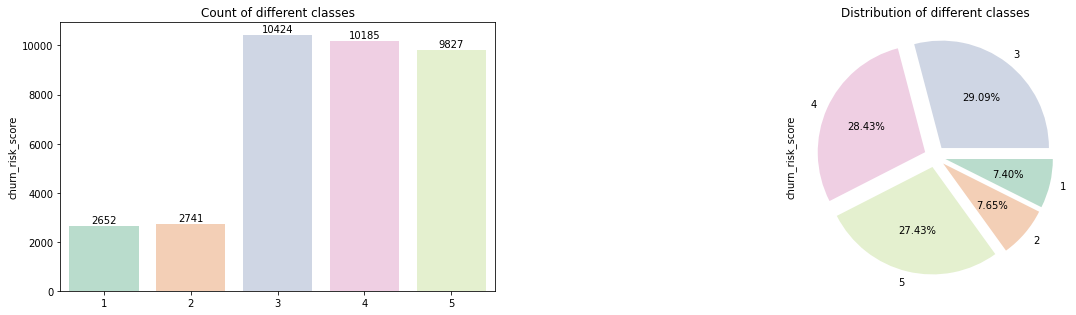

In [92]:
fig = plt.figure(constrained_layout=True, figsize=(19,8))
grid = gridspec.GridSpec(ncols=12, nrows=8, figure=fig)

ax1 = fig.add_subplot(grid[0:4, :4])
df['churn_risk_score'].value_counts()
g = sns.barplot(x=df['churn_risk_score'].value_counts().index,y=df['churn_risk_score'].value_counts(), palette='Pastel2')
for i in g.patches:
    g.annotate('{:.0f}'.format(i.get_height()), (i.get_x()+0.4, i.get_height()+20),ha='center', va='bottom',
               color= 'black')
plt.title('Count of different classes')

ax2 = fig.add_subplot(grid[0:4, 4:])
colors = ['#CFD6E4', '#EFCFE3', '#E4F0CF', '#F3CFB6', '#B9DCCC']
df['churn_risk_score'].value_counts().plot(kind='pie', explode=[0.1,0.1,0.1,0.1,0.1], autopct='%.2f%%', colors=colors)
plt.title('Distribution of different classes')
plt.show()

## Visualizing countplot for :
internet_option
medium_of_operation
region_category
gender
w.r.t churn_risk_score

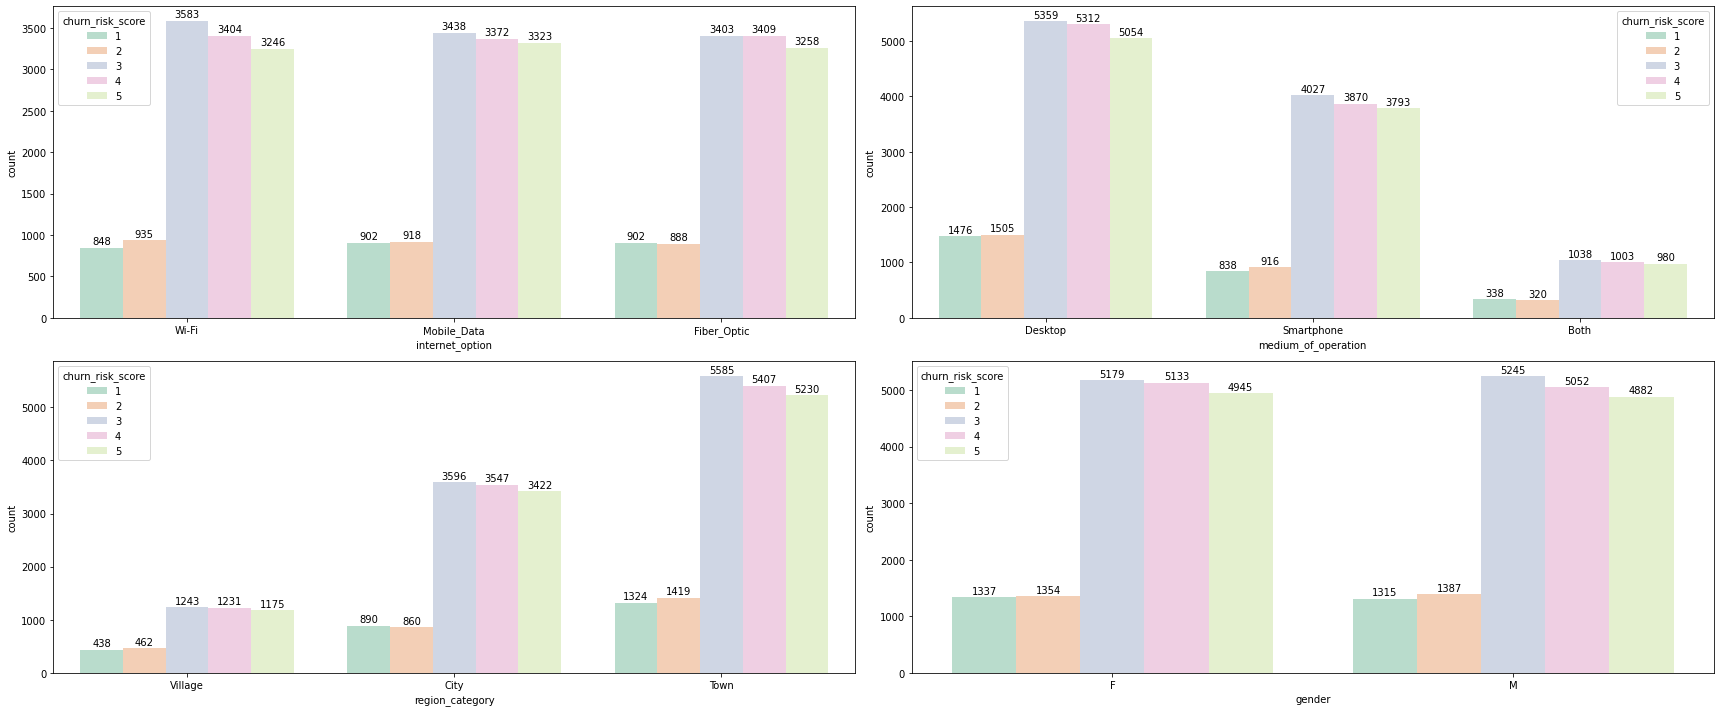

In [146]:
plt.figure(figsize=(24,10))

col= ['internet_option','medium_of_operation','region_category','gender']
i = 1
for a in col:
    
    plt.subplot(2,2,i)
    g = sns.countplot(x=a,hue='churn_risk_score',data=df,palette='Pastel2')
    for p in g.patches:
        g.annotate('{:.0f}'.format(p.get_height()), (p.get_x()+0.08, p.get_height()+20),ha='center', va='bottom',
                   color= 'black')
    i = i+1
    
plt.tight_layout()

In [147]:
colname=[]
for x in df.columns:
    if df[x].dtype=='object':
        colname.append(x)
colname

['gender',
 'region_category',
 'membership_category',
 'joined_through_referral',
 'preferred_offer_types',
 'medium_of_operation',
 'internet_option',
 'used_special_discount',
 'offer_application_preference',
 'past_complaint',
 'complaint_status',
 'feedback']

## Label Encoding
Fitting data

    1. Fetching the unique value.
    2. Arrange them in ascending order.
    3. Map the values start with 0,1,2....

Transforming data
    Here it actually replace the data values in the DataFrame

In [148]:
from sklearn import preprocessing ##Coverting categorical features into numerical using Label_Encoder

le=preprocessing.LabelEncoder()

for x in colname:
    df[x]=le.fit_transform(df[x])

In [149]:
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,churn_risk_score,joining_day,joining_month,joining_year
0,18,0,2,3,0,1,1,2,17,300.63,...,781.750000,1,1,0,1,4,2,17,8,2017
1,32,0,0,4,0,1,1,1,16,306.34,...,686.849231,1,0,1,2,5,1,28,8,2017
2,44,0,1,2,1,1,1,2,14,516.16,...,500.690000,0,1,1,3,3,5,11,11,2016
3,37,1,0,2,1,1,1,1,11,53.27,...,567.660000,0,1,1,4,3,5,29,10,2016
4,31,0,0,2,0,0,2,1,20,113.13,...,663.060000,0,1,1,2,3,5,12,9,2017


In [150]:
lastcolumn = df.pop('churn_risk_score')
df['churn_risk_score'] = lastcolumn
df.head()

,age,gender,region_category,membership_category,joined_through_referral,preferred_offer_types,medium_of_operation,internet_option,days_since_last_login,avg_time_spent,...,points_in_wallet,used_special_discount,offer_application_preference,past_complaint,complaint_status,feedback,joining_day,joining_month,joining_year,churn_risk_score
0,18,0,2,3,0,1,1,2,17,300.63,...,781.750000,1,1,0,1,4,17,8,2017,2
1,32,0,0,4,0,1,1,1,16,306.34,...,686.849231,1,0,1,2,5,28,8,2017,1
2,44,0,1,2,1,1,1,2,14,516.16,...,500.690000,0,1,1,3,3,11,11,2016,5
3,37,1,0,2,1,1,1,1,11,53.27,...,567.660000,0,1,1,4,3,29,10,2016,5
4,31,0,0,2,0,0,2,1,20,113.13,...,663.060000,0,1,1,2,3,12,9,2017,5


In [151]:
X = df.drop('churn_risk_score',axis = 1)        # Independent Variable
Y = df['churn_risk_score']                      # Dependent Variable [target variable]
Y=Y.astype(int)

In [152]:
print(X.shape)
print(Y.shape)

(35829, 21)
(35829,)


In [153]:
from sklearn.model_selection import train_test_split

#Split the data into test and train
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3,random_state=10)

In [154]:
print(X_train.shape)
print(Y_train.shape)
print(X_test.shape)
print(Y_test.shape)

(25080, 21)
(25080,)
(10749, 21)
(10749,)


In [155]:
from sklearn.preprocessing import StandardScaler ## Using StandardScaler to scale the train and test sets into scaled versions.
scaler= StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [156]:
print(X_train)
print(" ---------------------------------------------------------------------------------------------------------  ")
print(X_test)

[[-0.13747064  1.00471606 -1.20390411 ...  1.29089891  0.71533323
   1.21536271]
 [-0.70445413 -0.99530607 -1.20390411 ...  0.60899085 -1.02037382
   1.21536271]
 [-0.83045046  1.00471606 -1.20390411 ... -0.07291722 -1.59894284
  -1.22236095]
 ...
 [ 0.42951285  1.00471606  0.33581619 ... -1.66403604 -0.73108931
  -1.22236095]
 [-0.95644679 -0.99530607 -1.20390411 ...  0.15438547 -0.73108931
  -0.00349912]
 [-0.07447247 -0.99530607  0.33581619 ... -0.52752259 -0.1525203
  -1.22236095]]
 ---------------------------------------------------------------------------------------------------------  
[[-1.52343029 -0.99530607 -1.20390411 ...  0.26803682 -0.44180481
  -0.00349912]
 [ 0.80750185 -0.99530607  0.33581619 ... -1.323082   -1.30965833
   1.21536271]
 [ 1.68947617 -0.99530607 -1.20390411 ... -0.75482528  1.58318675
  -0.00349912]
 ...
 [-0.70445413  1.00471606  0.33581619 ... -1.43673335 -0.73108931
  -0.00349912]
 [-1.58642845  1.00471606 -1.20390411 ... -0.64117394  1.29390224
  -1.

In [168]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier,GradientBoostingClassifier
from sklearn import ensemble
from xgboost.sklearn import XGBClassifier
from sklearn.metrics import confusion_matrix, accuracy_score,classification_report

In [162]:
model_DecisionTree=DecisionTreeClassifier(criterion="gini",random_state=10)

#fit the model on the data and predict the values
model_DecisionTree.fit(X_train,Y_train)
Y_pred=model_DecisionTree.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)


              precision    recall  f1-score   support

           1       0.73      0.74      0.74       779
           2       0.75      0.75      0.75       831
           3       0.91      0.91      0.91      3157
           4       0.64      0.64      0.64      2998
           5       0.73      0.73      0.73      2984

    accuracy                           0.76     10749
   macro avg       0.75      0.75      0.75     10749
weighted avg       0.76      0.76      0.76     10749

Accuracy of The Model : 76.10940552609546


In [163]:
model_AdaBoost=AdaBoostClassifier(base_estimator=DecisionTreeClassifier(random_state=10),
                                  n_estimators=10,
                                  random_state=10)
#fit the model on the data and predict the values
model_AdaBoost.fit(X_train,Y_train)
Y_pred=model_AdaBoost.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

              precision    recall  f1-score   support

           1       0.73      0.74      0.74       779
           2       0.76      0.74      0.75       831
           3       0.91      0.92      0.91      3157
           4       0.64      0.65      0.64      2998
           5       0.73      0.72      0.73      2984

    accuracy                           0.76     10749
   macro avg       0.75      0.75      0.75     10749
weighted avg       0.76      0.76      0.76     10749

Accuracy of The Model : 76.10010233510094


In [164]:
model_RandomForest=RandomForestClassifier(n_estimators=100, random_state=10)

#fit the model on the data and predict the values
model_RandomForest.fit(X_train,Y_train)

Y_pred=model_RandomForest.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

              precision    recall  f1-score   support

           1       0.72      0.76      0.74       779
           2       0.76      0.71      0.74       831
           3       0.91      0.90      0.91      3157
           4       0.68      0.60      0.64      2998
           5       0.72      0.82      0.77      2984

    accuracy                           0.77     10749
   macro avg       0.76      0.76      0.76     10749
weighted avg       0.77      0.77      0.77     10749

Accuracy of The Model : 76.80714485068378


In [165]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=150,
                                                  random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

              precision    recall  f1-score   support

           1       0.70      0.88      0.78       779
           2       0.85      0.65      0.74       831
           3       0.93      0.90      0.91      3157
           4       0.73      0.59      0.65      2998
           5       0.72      0.89      0.79      2984

    accuracy                           0.79     10749
   macro avg       0.79      0.78      0.78     10749
weighted avg       0.79      0.79      0.78     10749

Accuracy of The Model : 78.73290538654759


In [169]:
model_XGradientBoosting=XGBClassifier(n_estimators=150,leaning_rate = 0.01 ,max_depth = 15, random_state=10)

#fit the model on the data and predict the values
model_XGradientBoosting.fit(X_train,Y_train)

Y_pred=model_XGradientBoosting.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

[18:34:15] WARNING: ..\src\learner.cc:573: 
Parameters: { "leaning_rate" } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[18:34:17] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.71      0.78      0.74       779
           2       0.77      0.70      0.74       831
           3       0.92      0.91      0.92      3157
           4       0.67      0.62      0.64      2998
           5       0.73      0.79      0.76      2984

    accuracy                           0.77     10749
   macro avg       0.76      0.76

In [171]:
model_XGradientBoosting=XGBClassifier(n_estimators=150,leaning_rate = 0.01 ,max_depth = 15, random_state=10)

#fit the model on the data and predict the values
model_XGradientBoosting.fit(X_train,Y_train)

Y_pred=model_XGradientBoosting.predict(X_test)
print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

[18:38:24] WARNING: ..\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'multi:softprob' was changed from 'merror' to 'mlogloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
              precision    recall  f1-score   support

           1       0.71      0.75      0.73       779
           2       0.76      0.71      0.73       831
           3       0.92      0.91      0.91      3157
           4       0.68      0.62      0.65      2998
           5       0.73      0.81      0.77      2984

    accuracy                           0.77     10749
   macro avg       0.76      0.76      0.76     10749
weighted avg       0.77      0.77      0.77     10749

Accuracy of The Model : 77.3188203553819


                      Model  accuracy
0             Decision Tree     76.10
1             Random Forest     76.80
2         Adaptive Boosting     76.10
3         Gradient Boosting     78.73
4  Xtream Gradient Boosting     77.07


Text(0.5, 1.0, 'Accuracy for models')

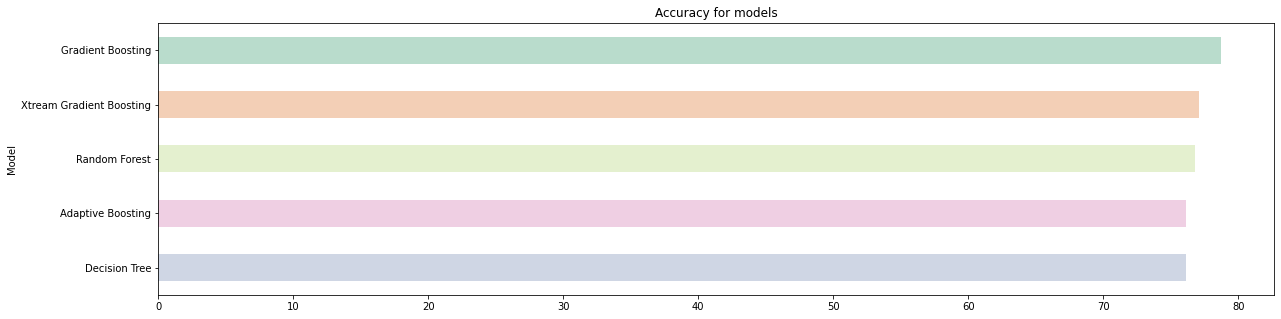

In [208]:
Models = ["Decision Tree","Random Forest","Adaptive Boosting","Gradient Boosting","Xtream Gradient Boosting"]
Accuracy = [76.10,76.80,76.10,78.73,77.07]
Models = pd.DataFrame({'Model':Models,'accuracy':Accuracy})
print(Models)
Models = Models.set_index('Model')
plt.figure(figsize=(20,5))
Models['accuracy'].sort_values().plot(kind='barh', color=colors, align='center')
plt.title('Accuracy for models')

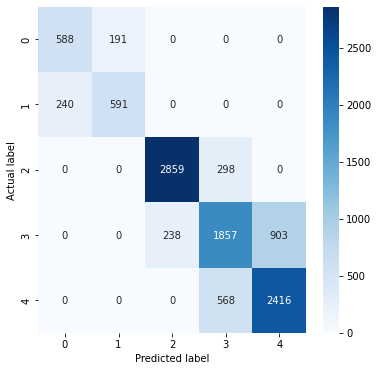

In [209]:
## Gradient Boosting is optimal 
plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

## Tuning Gradient Boosting with Hyperparameter

In [210]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=63,max_depth= 4,max_features= 12,
                                                  min_samples_leaf= 2,min_samples_split= 11,random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(X_test)

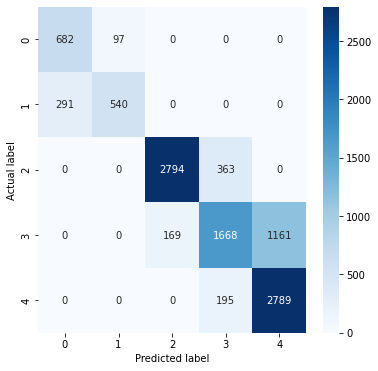

              precision    recall  f1-score   support

           1       0.70      0.88      0.78       779
           2       0.85      0.65      0.74       831
           3       0.94      0.89      0.91      3157
           4       0.75      0.56      0.64      2998
           5       0.71      0.93      0.80      2984

    accuracy                           0.79     10749
   macro avg       0.79      0.78      0.77     10749
weighted avg       0.80      0.79      0.78     10749

Accuracy of The Model : 78.8259372964927


In [211]:
plt.figure(figsize=(6, 6))
ax = plt.subplot()
cm = confusion_matrix(Y_test,Y_pred)
sns.heatmap(cm, annot=True, ax = ax, fmt = 'g' ,cmap=plt.cm.Blues)
ax.set_xlabel('Predicted label')
ax.set_ylabel('Actual label')
plt.show()

print(classification_report(Y_test,Y_pred))
print("Accuracy of The Model :",accuracy_score(Y_test,Y_pred)*100)

## Testing Data
# Pre-processing on Testing Data

In [215]:
wd = os.getcwd()
filepath1 = os.path.join(pwd, "test.csv")
filepath1

'd:\\python_ml\\New folder\\test.csv'

In [217]:
tf = pd.read_csv(filepath1 , na_values = ['?','Error','Unknown'])

tf.drop(['customer_id', 'Name' , 'security_no' ,
       'referral_id', 'last_visit_time'] , axis = 1 , inplace = True)

tf['region_category'] = tf['region_category'].fillna(tf['region_category'].mode()[0])
tf['preferred_offer_types'] = tf['preferred_offer_types'].fillna(tf['preferred_offer_types'].mode()[0])
tf['points_in_wallet'] = tf['points_in_wallet'].fillna(tf['points_in_wallet'].mean())

tf['gender'] = tf['gender'].fillna(tf['gender'].mode()[0])

tf['joined_through_referral'] = tf['joined_through_referral'].fillna(tf['joined_through_referral'].mode()[0])
tf['medium_of_operation'] = tf['medium_of_operation'].fillna(tf['medium_of_operation'].mode()[0])
tf['avg_frequency_login_days'] = tf['avg_frequency_login_days'].fillna(tf['avg_frequency_login_days'].mean())


tf['joining_day'] = pd.to_datetime(tf.joining_date , format = "%Y/%m/%d").dt.day
tf['joining_month'] = pd.to_datetime(tf.joining_date , format = "%Y/%m/%d").dt.month
tf['joining_year'] = pd.to_datetime(tf.joining_date , format = "%Y/%m/%d").dt.year

tf.drop(['joining_date'] , axis = 1 , inplace = True)


colname=[]
for x in tf.columns:
    if tf[x].dtype=='object':
        colname.append(x)
        

for x in colname:
    tf[x]=le.fit_transform(tf[x])

                                                                       
#tf.head()                                                                       
test = scaler.transform(tf)

## Applying Tuned Gradient Boosting Classifier on Testing Data

In [218]:
from sklearn.ensemble import GradientBoostingClassifier

model_GradientBoosting=GradientBoostingClassifier(n_estimators=63,max_depth= 4,max_features= 12,
                                                  min_samples_leaf= 2,min_samples_split= 11,random_state=10)

#fit the model on the data and predict the values
model_GradientBoosting.fit(X_train,Y_train)

Y_pred=model_GradientBoosting.predict(test)

In [219]:

Y_pred

array([3, 3, 3, ..., 5, 4, 3])

In [220]:
testing_data = pd.read_csv(filepath1, na_values = ['?','Error','Unknown'])

Churn_Risk_Score=testing_data[['customer_id','Name']]
Churn_Risk_Score['Churn Score'] = Y_pred

In [221]:
Churn_Risk_Score

,customer_id,Name,Churn Score
0,fffe43004900440031003700300030003400,Alethia Meints,3
1,fffe43004900440031003900370037003300,Ming Lopez,3
2,fffe43004900440034003800360037003000,Carina Flannigan,3
3,fffe43004900440036003200370033003400,Kyung Wanner,3
4,fffe43004900440035003000370031003900,Enola Gatto,5
...,...,...,...
19914,fffe43004900440035003600330037003800,Kraig Peele,3
19915,fffe43004900440032003900370037003100,Damaris Sabol,5
19916,fffe43004900440036003100310036003700,Loura Huckstep,5
19917,fffe43004900440034003200330033003600,Sharita Clubb,4


In [222]:
Churn_Risk_Score.to_csv('Customer_Churn_Score Data.csv')